In [45]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

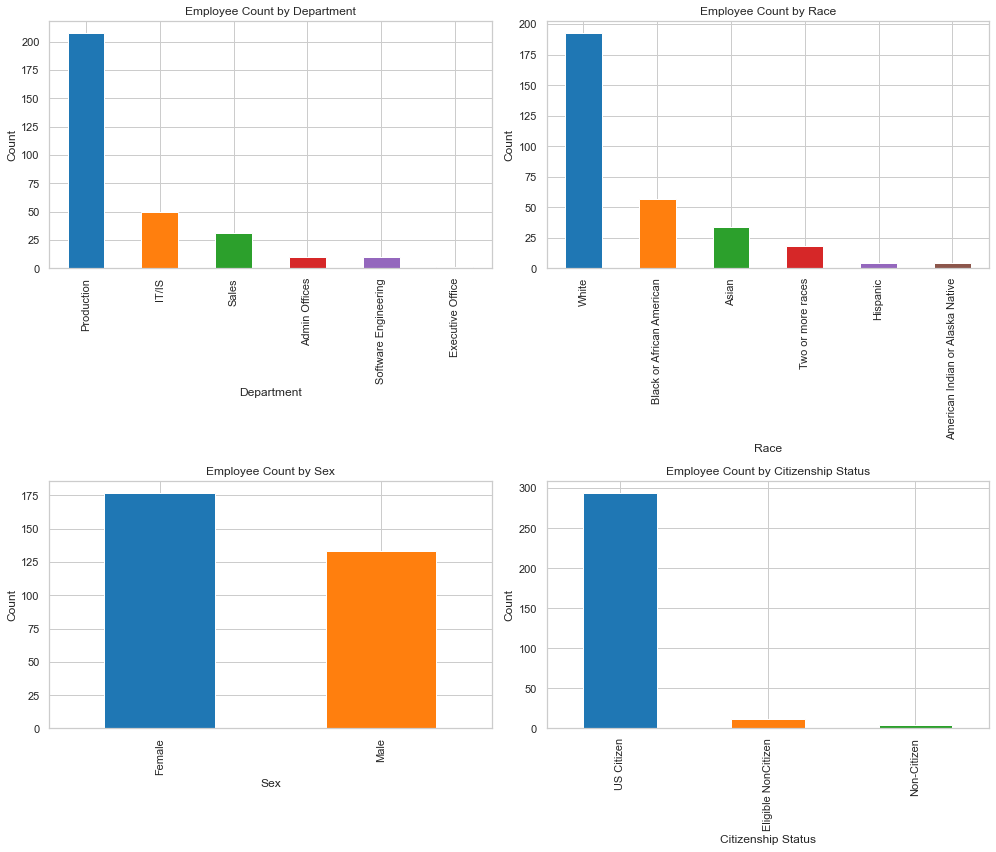

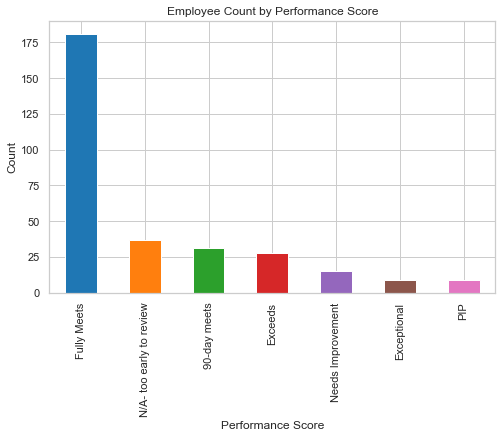

In [51]:
recruitment_costs = pd.read_csv("recruitment_source.csv", sep=";")
salary_grid = pd.read_csv("salary_grid.csv", sep=";")
staff_particulars = pd.read_csv("staff_particulars.csv", sep=";")


staff_salary_info = pd.merge(staff_particulars, salary_grid, on="Position", how="left")


department_count = staff_salary_info["Department"].value_counts()
race_count = staff_salary_info["RaceDesc"].value_counts()
sex_count = staff_salary_info["Sex"].value_counts()
citizenship_count = staff_salary_info["CitizenDesc"].value_counts()
performance_count = staff_salary_info["Performance Score"].value_counts()


palette = sns.color_palette("tab10")

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot department count
department_count.plot(kind="bar", color=palette[:len(department_count)], ax=axes[0, 0])
axes[0, 0].set_title("Employee Count by Department")
axes[0, 0].set_xlabel("Department")
axes[0, 0].set_ylabel("Count")

# Plot race count
race_count.plot(kind="bar", color=palette[:len(race_count)], ax=axes[0, 1])
axes[0, 1].set_title("Employee Count by Race")
axes[0, 1].set_xlabel("Race")
axes[0, 1].set_ylabel("Count")

# Plot sex count
sex_count.plot(kind="bar", color=palette[:len(sex_count)], ax=axes[1, 0])
axes[1, 0].set_title("Employee Count by Sex")
axes[1, 0].set_xlabel("Sex")
axes[1, 0].set_ylabel("Count")

# Plot citizenship count
citizenship_count.plot(kind="bar", color=palette[:len(citizenship_count)], ax=axes[1, 1])
axes[1, 1].set_title("Employee Count by Citizenship Status")
axes[1, 1].set_xlabel("Citizenship Status")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Plot performance score
plt.figure(figsize=(8, 5))
performance_count.plot(kind="bar", color=palette[:len(performance_count)])
plt.title("Employee Count by Performance Score")
plt.xlabel("Performance Score")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


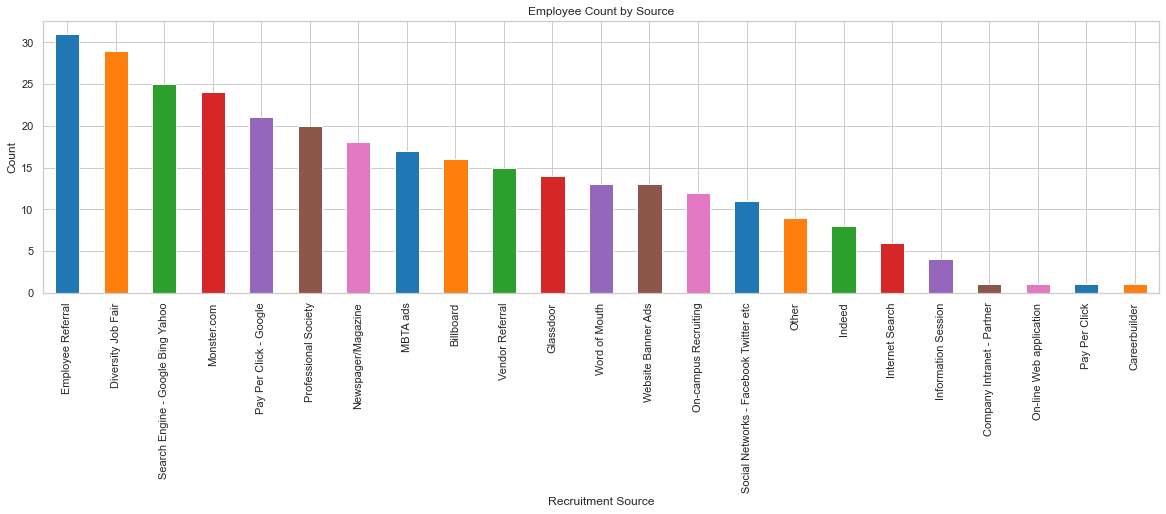

In [47]:
source_count = staff_salary_info['Employee Source'].value_counts()

# Plot source count
plt.figure(figsize=(20, 5))
source_count.plot(kind="bar", color=palette[:len(performance_count)])
plt.title("Employee Count by Source")
plt.xlabel("Recruitment Source")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

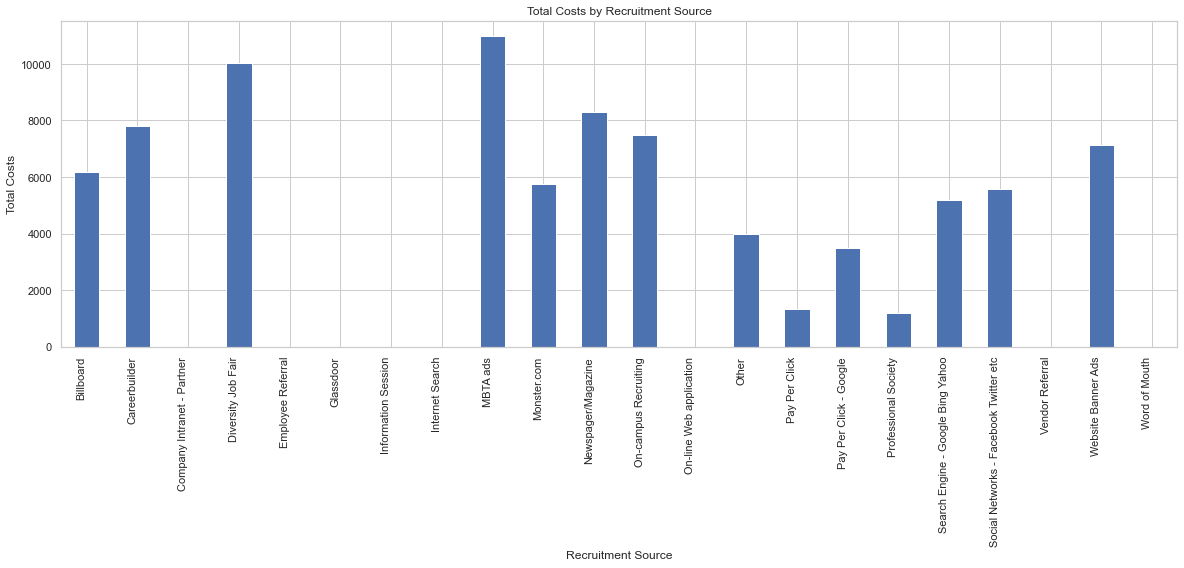

In [60]:

recruitment_data = recruitment_costs.drop(columns=['Total'])
recruitment_data.set_index('Employment Source', inplace=True)

# Calculate the total employee count for each recruitment source
total_employees = recruitment_data.sum(axis=1)

# Plot the bar chart
plt.figure(figsize=(20, 6))
total_employees.plot(kind="bar")
plt.title("Total Costs by Recruitment Source")
plt.xlabel("Recruitment Source")
plt.ylabel("Total Costs")
plt.xticks(rotation=90, ha='right')
plt.show()


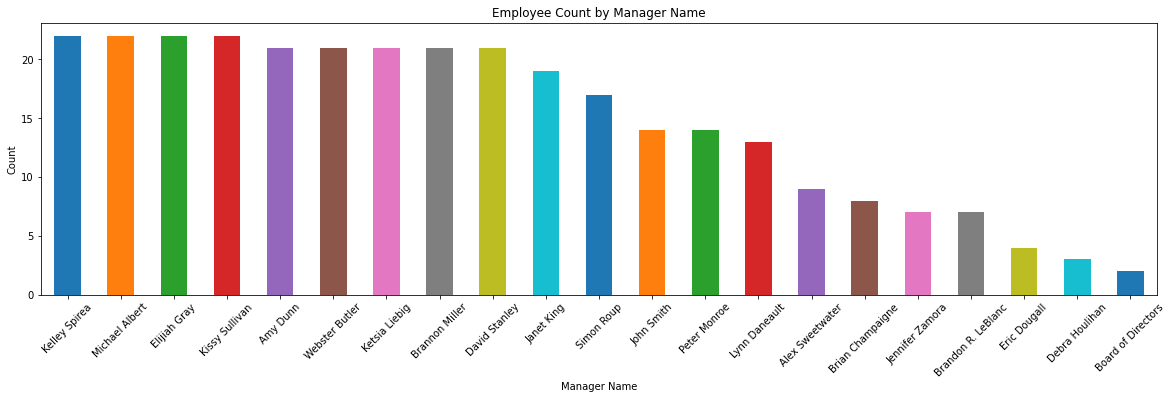

In [6]:
# Count of employees by manager name
Manager_count = staff_salary_info['Manager Name'].value_counts()

plt.figure(figsize=(20, 5))
Manager_count.plot(kind="bar", color=palette[:len(Manager_count)])
plt.title("Employee Count by Manager Name")
plt.xlabel("Manager Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

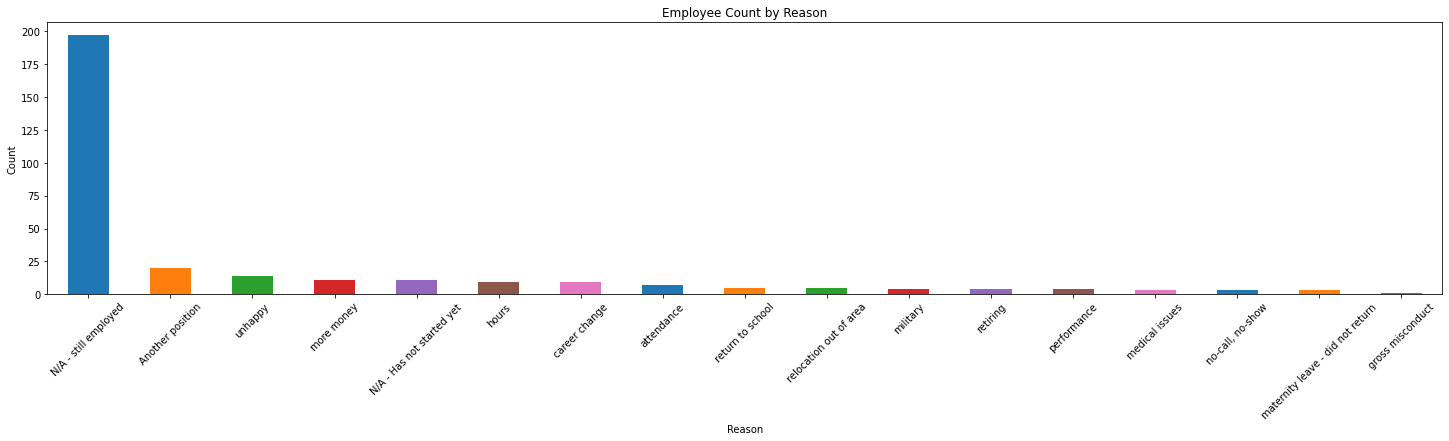

In [7]:

reason_count = staff_salary_info['Reason For Term'].value_counts()

plt.figure(figsize=(25, 5))
reason_count.plot(kind="bar", color=palette[:len(performance_count)])
plt.title("Employee Count by Reason")
plt.xlabel("Reason")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

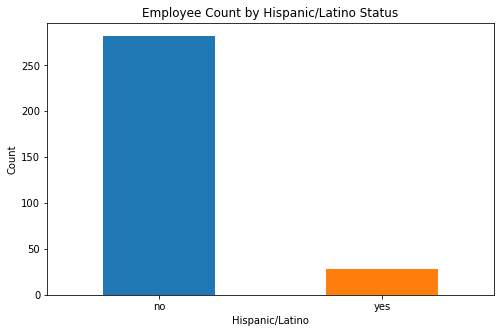

In [8]:

staff_salary_info["Hispanic/Latino"] = staff_salary_info["Hispanic/Latino"].str.lower()

hispanic_count = staff_salary_info["Hispanic/Latino"].value_counts()

plt.figure(figsize=(8, 5))
hispanic_count.plot(kind='bar', color=palette)
plt.title("Employee Count by Hispanic/Latino Status")
plt.xlabel("Hispanic/Latino")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

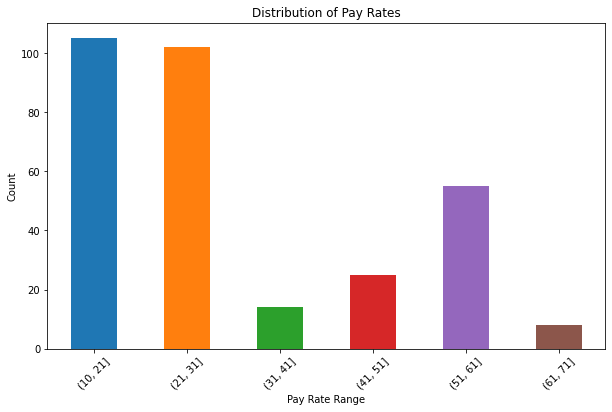

In [9]:

pay_rate_bins = [10, 21, 31, 41, 51, 61, 71]


pay_rate_ranges = pd.cut(staff_salary_info['Pay Rate'], bins=pay_rate_bins)

plt.figure(figsize=(10, 6))
pay_rate_ranges.value_counts().sort_index().plot(kind='bar', color=palette)
plt.title("Distribution of Pay Rates")
plt.xlabel("Pay Rate Range")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


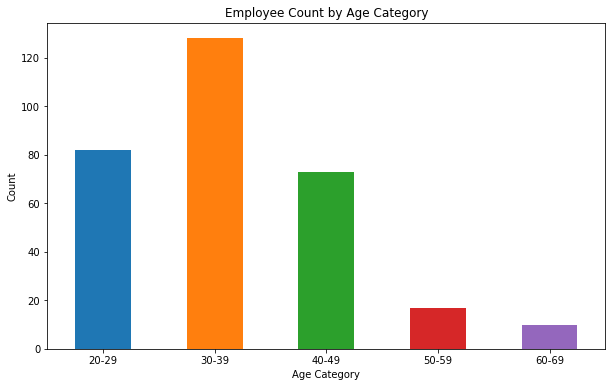

In [16]:
staff_salary_info['DOB'] = pd.to_datetime(staff_salary_info['DOB'])


current_year = 2016
staff_salary_info['age'] = current_year - staff_salary_info['DOB'].dt.year

age_bins = [20, 30, 40, 50, 60, 70]  
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69'] 

staff_salary_info['age_category'] = pd.cut(staff_salary_info['age'], bins=age_bins, labels=age_labels)
age_category_counts = staff_salary_info['age_category'].value_counts().sort_index()

#Plot
plt.figure(figsize=(10, 6))
age_category_counts.plot(kind='bar', color=palette)
plt.title("Employee Count by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

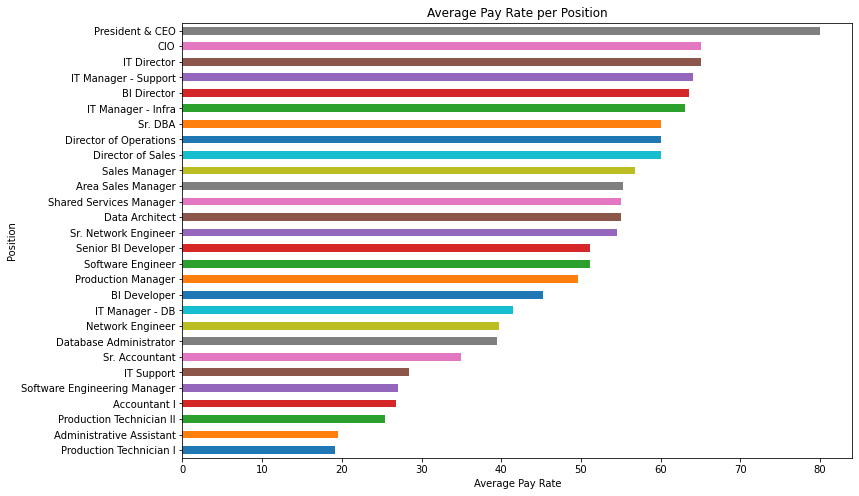

In [12]:
# Calculate the average pay rate per position
avg_pay_rate_per_position = df.groupby('Position')['Pay Rate'].mean()

# Plot the average pay rate per position
plt.figure(figsize=(12, 8))
avg_pay_rate_per_position.sort_values().plot(kind='barh', color=palette)
plt.title('Average Pay Rate per Position')
plt.xlabel('Average Pay Rate')
plt.ylabel('Position')
plt.show()

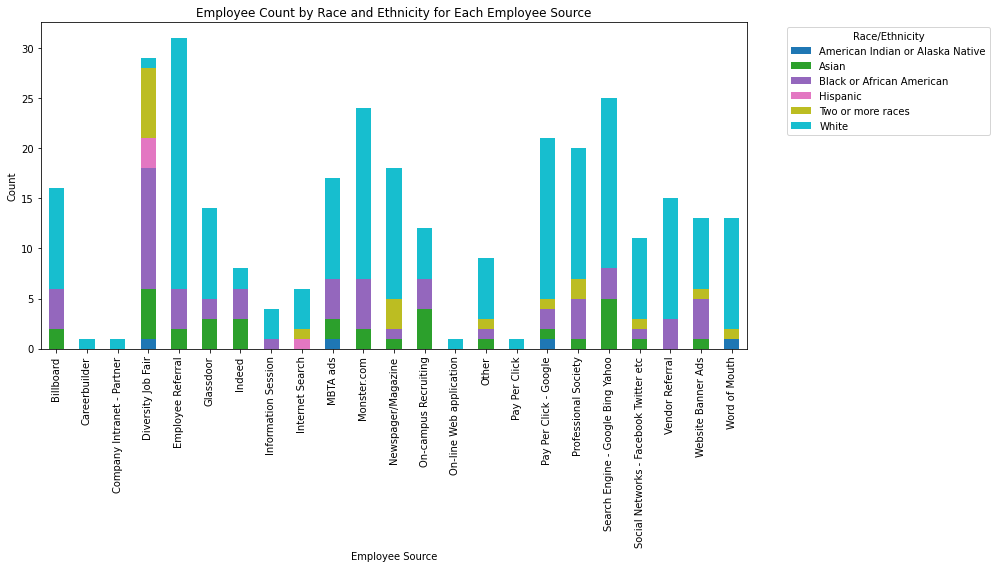

In [13]:
# Group by Employee Source and Race/Ethnicity and count the number of employees
source_race_counts = df.groupby(['Employee Source', 'RaceDesc']).size().unstack(fill_value=0)

# Plot
source_race_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10')
plt.title('Employee Count by Race and Ethnicity for Each Employee Source')
plt.xlabel('Employee Source')
plt.ylabel('Count')
plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### ***Explanatory Analysis***:

1. **Employee Sources**:
   - **High Recruitment Costs**: Diversity Job Fair has the 2nd highest recruitment cost but provides a consistent source of new hires.
   - **Digital Recruitment**: Heavy reliance on online platforms like Monster.com and Google suggests an effective digital recruitment strategy

2. **Position and Department**:
   - **Production Department**: The highest number of employees in the Production Department indicates its critical role within the company.
   - **Diverse Roles**: There is a wide variety of positions, reflecting a complex organizational structure with different functional areas.

3. **Salary Range**:
   - **Technical Roles**: Higher salary ranges for positions like Sr. DBA, Sr. Network Engineer, and Sr. Accountant highlight the demand for technical expertise.
   - **Salary Distribution**: Technical roles within staff positions generally have higher salary ranges, indicating their specialized nature and value to the company.

4. **Sex, Marital Status, Citizenship, Race/Ethnicity**:
   - **Diversity**: The workforce is diverse, with representation across different sexes, marital statuses, citizenship statuses, and race/ethnicity.
   - **Inclusive Workforce**: The mix of US citizens and non-citizens, as well as various races and ethnicities, suggests an inclusive hiring policy.

5. **Hiring and Termination Dates**:
   - **Employee Tenure**: Analysis of hiring and termination dates shows varied tenures, with some employees having long-term commitments and others with shorter tenures.
   - **Turnover Rates**: Examining these dates helps identify patterns in employee turnover and retention.

6. **Reasons for Termination**:
   - **Varied Reasons**: Terminations occur for multiple reasons, including voluntary departures for career changes, relocations, or medical issues.
   - **Involuntary Terminations**: Some terminations are due to performance issues or organizational restructuring.

7. **Performance Scores**:
   - **Performance Variation**: Scores range from "Needs Improvement" to "Exceptional," showing a wide spectrum of employee performance levels.
   - **Performance Impact**: High performance scores are generally associated with higher pay rates and lower termination rates.

8. **Pay Rates**:
   - **Pay Variability**: Pay rates vary significantly across positions and individuals, reflecting differences in job roles, performance, and seniority.
   - **Performance-Based Pay**: Higher pay rates for high-performing employees suggest a performance-based pay structure.

9. **Age**:
   - **Age Distribution**: Employee ages mostly range from 30-39, indicating a relatively young workforce.





**Question 2**
What are the best recruitment sources for this company to use?  (You may define the criteria for what “best” is)

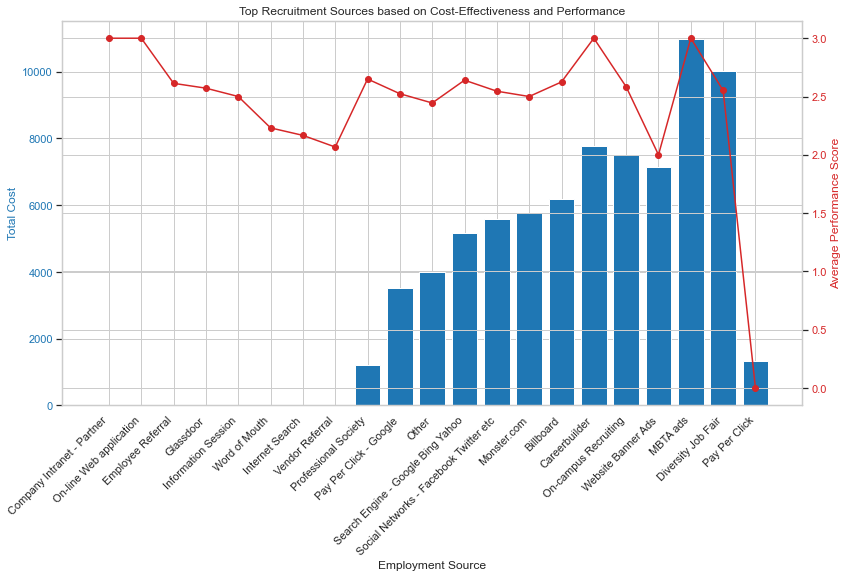

In [46]:
# Hypothetical mapping of performance scores to numerical values
performance_score_mapping = {
    'Exceptional': 5,
    'Exceeds': 4,
    'Fully Meets': 3,
    '90-day meets': 2,
    'Needs Improvement': 1,
    'N/A- too early to review': 0,
    'PIP': 0   #PIP : Performance Improvement Plan
}

# Load performance scores data
performance_scores = pd.read_csv('staff_particulars.csv', sep=';')

# Convert performance scores to numerical values
performance_scores['Numerical Score'] = performance_scores['Performance Score'].map(performance_score_mapping)

# Calculate the average performance score for each employment source
average_performance_scores = performance_scores.groupby('Employee Source')['Numerical Score'].mean().reset_index()
average_performance_scores.columns = ['Employment Source', 'Average Performance Score']

# Load recruitment cost data
recruitment_cost_data = {
    'Employment Source': [
        'Billboard', 'Careerbuilder', 'Company Intranet - Partner', 'Diversity Job Fair',
        'Employee Referral', 'Glassdoor', 'Information Session', 'Internet Search',
        'MBTA ads', 'Monster.com', 'Newspaper/Magazine', 'On-campus Recruiting',
        'On-line Web application', 'Other', 'Pay Per Click', 'Pay Per Click - Google',
        'Professional Society', 'Search Engine - Google Bing Yahoo',
        'Social Networks - Facebook Twitter etc', 'Vendor Referral', 'Website Banner Ads',
        'Word of Mouth'
    ],
    'Total Cost': [
        6192, 7790, 0, 10021, 0, 0, 0, 0, 10980, 5760, 8291, 7500, 0, 3995, 1323, 3509,
        1200, 5183, 5573, 0, 7143, 0
    ]
}

recruitment_cost_df = pd.DataFrame(recruitment_cost_data)

# Merge average performance scores with recruitment cost data
combined_data = pd.merge(recruitment_cost_df, average_performance_scores, on='Employment Source', how='inner')

# Separate sources with zero cost and non-zero cost
zero_cost_sources = combined_data[combined_data['Total Cost'] == 0]
non_zero_cost_sources = combined_data[combined_data['Total Cost'] > 0]

# Sort zero cost sources by average performance score
zero_cost_sources_sorted = zero_cost_sources.sort_values(by='Average Performance Score', ascending=False)

# Calculate cost-effectiveness for non-zero cost sources
non_zero_cost_sources['Cost-Effectiveness'] = non_zero_cost_sources['Average Performance Score'] / non_zero_cost_sources['Total Cost']

# Sort non-zero cost sources by cost-effectiveness
non_zero_cost_sources_sorted = non_zero_cost_sources.sort_values(by='Cost-Effectiveness', ascending=False)

# Combine the top sources from both lists
top_sources = pd.concat([zero_cost_sources_sorted, non_zero_cost_sources_sorted])

# Plotting for visualization
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
ax1.set_xlabel('Employment Source')
ax1.set_ylabel('Total Cost', color=color)
ax1.bar(top_sources['Employment Source'], top_sources['Total Cost'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(top_sources['Employment Source'], rotation=45, ha='right')

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Average Performance Score', color=color)
ax2.plot(top_sources['Employment Source'], top_sources['Average Performance Score'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Top Recruitment Sources based on Cost-Effectiveness and Performance')
plt.show()




#### ***Analysis***

1. **Data Preparation**:
   - The performance scores of employees were mapped to numerical values and averaged based on their employment sources.
   - Recruitment cost data was merged with the performance data, allowing a comparison of average performance scores against the costs associated with each recruitment source.

2. **Segregation and Cost-Effectiveness**:
   - Employment sources with zero recruitment cost were separated from those with non-zero costs.
   - For sources with non-zero costs, a cost-effectiveness metric was calculated by dividing the average performance score by the total cost.

3. **Sorting and Visualization**:
   - Employment sources were sorted based on their average performance scores and cost-effectiveness.
   - Top-performing sources from both zero-cost and non-zero cost categories were combined and visualized in a dual-axis chart showing both the recruitment cost and the average performance score.

#### ***Insights***

1. **Top Recruitment Sources**:
   - **Zero-Cost Sources**: Some recruitment sources requires no cost but yield high performance scores. These include `Employee Referral`, `Company Intranet - Partner`, and `Glassdoor`.
   - **Non-Zero Cost Sources**: Among paid sources, those with high cost-effectiveness include `Monster.com`, `Careerbuilder`, and `On-campus Recruiting`.

2. **Cost-Effectiveness**:
   - Recruitment sources with high cost-effectiveness provide the best value by producing high-performing employees at a relatively lower cost. For example, `Monster.com` and `Careerbuilder` demonstrate good performance-to-cost ratios.

3. **Performance and Cost Relationship**:
   - Some high-cost sources, like `MBTA ads` and `Diversity Job Fair`, also produce high-performing employees, indicating that investment in these sources can be justified if the budget allows.

#### ***Recommendations***

1. **Leverage Zero-Cost Sources**:
   - **Employee Referral Programs**: Enhance and promote employee referral programs. Employees tend to recommend candidates who fit the company culture and perform well.
   - **Company Intranet and Social Networks**: Utilize internal platforms and social media to attract candidates without incurring additional costs. Ensure these channels are actively maintained and monitored.

2. **Optimize Recruitment Budget**:
   - Allocate more budget to the most cost-effective sources identified. For instance, focus on `Monster.com`, `Careerbuilder`, and `On-campus Recruiting` to balance cost and quality.
   - Reduce spending on less effective sources unless they provide other strategic benefits.

3. **Strategic Investment in High-Cost Sources**:
   - While some sources have high costs, they also yield high performance scores. If the budget allows, maintain investments in sources like `Diversity Job Fair` and `MBTA ads` for their quality hires.

4. **Continuous Monitoring and Adjustment**:
   - Regularly monitor the performance and cost-effectiveness of all recruitment sources. Use data-driven insights to adjust the recruitment strategy dynamically.
   - Collect feedback from new hires and managers to assess the effectiveness of different recruitment channels and improve the recruitment process.

5. **Strengthen On-Campus and Professional Society Engagement**:
   - Engage with universities and professional societies through on-campus recruiting and information sessions. These sources can provide access to high-quality talent pools.

6. **Enhance Online Presence**:
   - Improve the company's presence on job boards and career websites like `Glassdoor` and `Careerbuilder`. Positive employer branding on these platforms can attract high-performing candidates.


**Question 3** 
Who is the best manager? (You may define the criteria for what “best” is) 
Based on the criteria you’ve defined, who is a low-performing manager? 


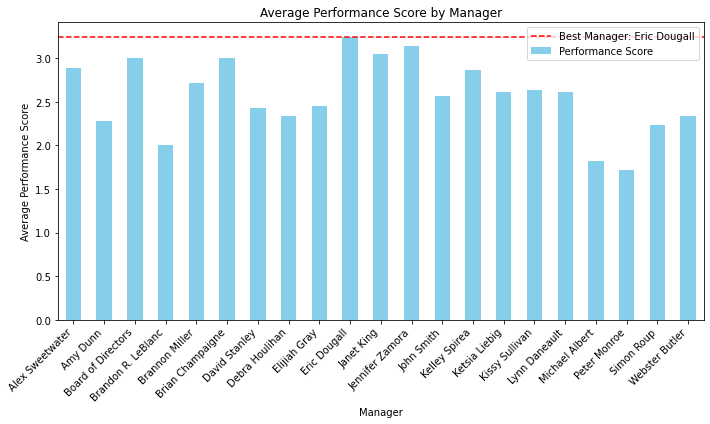

Best Manager: Eric Dougall


In [24]:
df = pd.read_csv('staff_particulars.csv', sep=";")

performance_score_mapping = {
    'Exceptional': 5,
    'Exceeds': 4,
    'Fully Meets': 3,
    '90-day meets': 2,
    'Needs Improvement': 1,
    'N/A- too early to review': 0,
    'PIP': 0  
}

df['Performance Score'] = df['Performance Score'].map(performance_score_mapping)

# Group the performance data by manager and calculate the average performance score
performance_grouped = df.groupby('Manager Name')['Performance Score'].mean()


plt.figure(figsize=(10, 6))
performance_grouped.plot(kind='bar', color='skyblue')
plt.title('Average Performance Score by Manager')
plt.xlabel('Manager')
plt.ylabel('Average Performance Score')
plt.xticks(rotation=45, ha='right')

best_manager = performance_grouped.idxmax()
best_manager_score = performance_grouped.max()
plt.axhline(y=best_manager_score, color='red', linestyle='--', label='Best Manager: ' + best_manager)
plt.legend()

plt.tight_layout()
plt.show()

print("Best Manager:", best_manager)

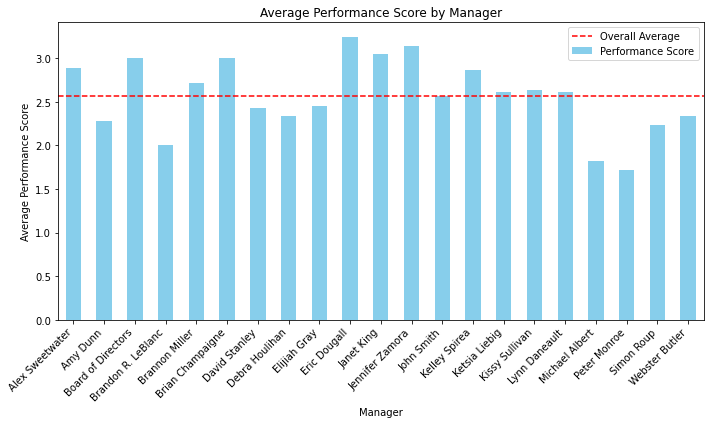

Low-performing Managers: ['Amy Dunn', 'Brandon R. LeBlanc', 'David Stanley', 'Debra Houlihan', 'Elijiah Gray', 'Michael Albert', 'Peter Monroe', 'Simon Roup', 'Webster Butler']


In [25]:
overall_avg_performance_score = performance_grouped.mean()

plt.figure(figsize=(10, 6))
performance_grouped.plot(kind='bar', color='skyblue')
plt.axhline(y=overall_avg_performance_score, color='red', linestyle='--', label='Overall Average')
plt.title('Average Performance Score by Manager')
plt.xlabel('Manager')
plt.ylabel('Average Performance Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Analysis
low_performing_managers = performance_grouped[performance_grouped < overall_avg_performance_score].index.tolist()
print("Low-performing Managers:", low_performing_managers)

#### ***Analysis***

The given code performs the following steps to analyze the performance scores of employees under different managers

1. **Group the data provided by Manager**:
   - The performance data is grouped by manager name to calculate the average performance score for each manager.

2. **Visualization**:
   - A bar chart is created to visualize the average performance scores by manager.
   - The manager with the highest average performance score is Eric Dougall. 

#### ***Insights***

1. **Top-performing Manager**:
   - The manager with the highest average performance score is identified as the best manager. This manager's team members have the highest average performance ratings, indicating effective leadership and management practices.

2. **Performance Score Distribution**:
   - The bar chart shows the distribution of average performance scores across different managers. Managers with lower scores may need to improve their management techniques or receive additional training to enhance their team's performance.

**Additional insights**:

3. **Variability in Management Effectiveness**:
   - There is likely to be variability in average performance scores among managers. This variability can be due to several factors, such as different management styles, team composition, and the specific challenges faced by different teams.

#### ***Recommendations***

1. **Recognize and Reward Top-performing Managers**:
   - Recognize the best-performing manager (as highlighted) for their effective management practices. Consider rewarding them through bonuses, public recognition, or career advancement opportunities to maintain high morale and incentivize other managers.

2. **Manager Training Programs**:
   - Implement training programs for managers with lower average performance scores. These programs can focus on leadership skills, team motivation, effective communication, and performance management techniques.

3. **Mentorship and Knowledge Sharing**:
   - Encourage top-performing managers to share their best practices and strategies with other managers. Establish a mentorship program where less experienced or struggling managers can learn from high-performing peers.

4. **Regular Performance Reviews and Feedback**:
   - Conduct regular performance reviews and provide constructive feedback to managers. Use performance data to identify areas for improvement and track progress over time.

5. **Investigate Underlying Causes**:
   - For managers with consistently low performance scores, investigate potential underlying causes. These could include issues such as team dynamics or external factors affecting performance. Addressing these issues can help improve overall performance.

6. **Set Clear Performance Expectations**:
   - Clearly communicate performance expectations and goals to all managers. Ensure that they have the necessary resources and support to achieve these goals. Regularly review and adjust these expectations based on changing circumstances and feedback.


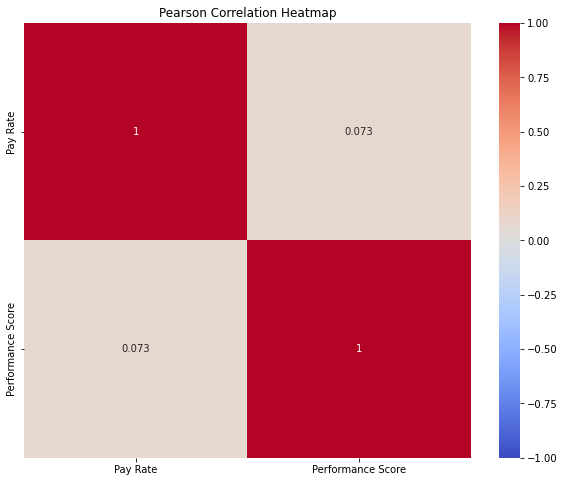

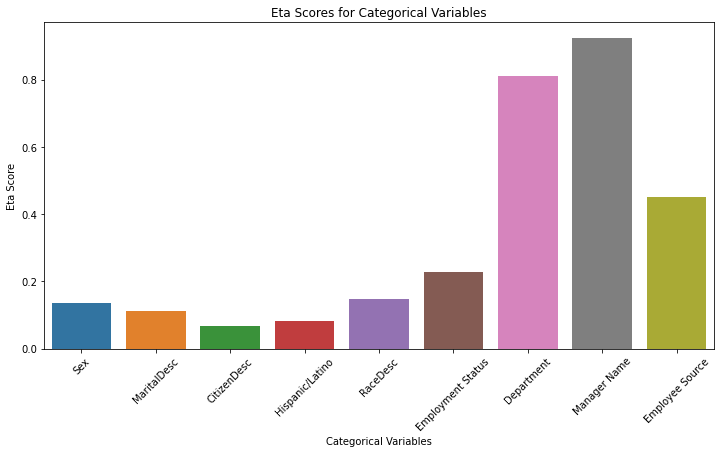

In [29]:
# Pearson correlation for numerical columns
numerical_columns = ['Pay Rate']
correlation_matrix = df[numerical_columns + ['Performance Score', 'Position']].corr()

# Correlation ratio (Eta) for categorical columns
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)

    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)

    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))

    if numerator == 0:
        return 0.0
    else:
        eta = np.sqrt(numerator / denominator)
        return eta

categorical_columns = ['Sex', 'MaritalDesc', 'CitizenDesc', 'Hispanic/Latino', 'RaceDesc', 'Employment Status', 'Department', 'Manager Name', 'Employee Source']
eta_scores = {}

for col in categorical_columns:
    eta_scores[col] = correlation_ratio(df[col], df['Pay Rate'])

# Plot Pearson Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

# Plot Eta Scores Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=list(eta_scores.keys()), y=list(eta_scores.values()))
plt.title('Eta Scores for Categorical Variables')
plt.ylabel('Eta Score')
plt.xlabel('Categorical Variables')
plt.xticks(rotation=45)
plt.show()




#### ***Insights***:

1. **Strongest Influence: Manager Name and Department**
   - **Manager Name (Eta: 0.9242576962267315)**:
     - The manager's name, likely corresponding to the managerial level or department head, has a very strong influence on the pay rate. This suggests that employees under certain managers receive higher pay, possibly due to the manager's influence, the department's budget, or the nature of the job roles under these managers.
   - **Department (Eta: 0.8111264026922907)**:
     - The department an employee works in also strongly influences pay rates. Departments with more specialized or critical functions likely offer higher salaries.

2. **Moderate Influence: Employment Status**
   - **Employment Status (Eta: 0.22734122031225804)**:
     - The employment status of an employee (active, terminated, etc.) has a moderate association with pay rates. Active employees are likely to have a different pay structure compared to those who are no longer with the company or are on leave.

3. **Weak Influence: Position, Tenure, Performance Score, Race, and Sex**
   - **Position (Pearson: 0.865011)**:
     - Position has a strong positive correlation with pay rate. Higher positions tend to have higher pay rates.
   - **Tenure (Pearson: 0.189797)**:
     - Tenure shows a weak positive correlation, indicating that longer tenure slightly associates with higher pay rates, but not strongly.
   - **Performance Score (Pearson: 0.071036)**:
     - Performance score has a very weak positive correlation, suggesting minimal impact on pay rate.
   - **RaceDesc (Eta: 0.1475003268656564)**:
     - Race shows a weak association, indicating some impact on pay rates but not very significant.
   - **Sex (Eta: 0.13615081802851658)**:
     - Sex also shows a weak association, suggesting that gender has minimal influence on pay rates.

4. **Least Influence: Citizenship, Marital Status, and Hispanic/Latino**
   - **CitizenDesc (Eta: 0.06596980933772999)**:
     - Citizenship status has the least influence on pay rate, indicating it is not a significant factor in determining pay.
   - **MaritalDesc (Eta: 0.11046221589175655)**:
     - Marital status has a weak association with pay rate.
   - **Hispanic/Latino (Eta: 0.08299407020864882)**:
     - Whether an employee is Hispanic or Latino has a minimal impact on their pay rate.

### ***Recommendations***:

1. **Standardize Pay Structures Across Managers and Departments**:
   - To ensure fairness and consistency, consider reviewing and standardizing pay structures across different managers and departments. This could involve setting clear guidelines for pay ranges within specific roles and levels, regardless of the department or manager.

2. **Enhance Pay Transparency and Equity**:
   - Conduct regular pay equity audits to identify and address any disparities that might exist due to several factors. Implementing transparent pay policies can help reduce biases and ensure fair compensation for all employees.

3. **Link Pay to Performance**:
   - Although performance scores shows weak correlations with pay, linking pay more closely to performance can motivate employees to perform better and stay longer with the company. Consider implementing structured performance-based incentives.

4. **Utilize Data for Strategic Decision-Making**:
   - Leverage data analytics to continuously monitor and analyze pay trends. Using data-driven insights can help in making informed decisions about compensation strategies and identifying areas that need improvement.

5. **Support Career Development**:
   - Since higher positions correlate strongly with higher pay rates, provide employees with clear career development paths. Offering training, mentorship, and promotion opportunities can help employees advance to higher-paying positions.



**Question 5** What are the characteristics and demography of employees that have a high probability of leaving the company in the next 3 months? 

In [31]:
# Create a new column 'Terminated' where 1 means terminated and 0 means not terminated
df['Terminated'] = df['Date of Termination'].notnull().astype(int)

# Get numbers of people who left (terminated) vs. stayed (not terminated)
termination_counts = df['Terminated'].value_counts()
print(termination_counts)
print()

# Get percentages of people who left (terminated) vs. stayed (not terminated)
termination_percentages = df['Terminated'].value_counts(normalize=True)
print(termination_percentages)

0    208
1    102
Name: Terminated, dtype: int64

0    0.670968
1    0.329032
Name: Terminated, dtype: float64


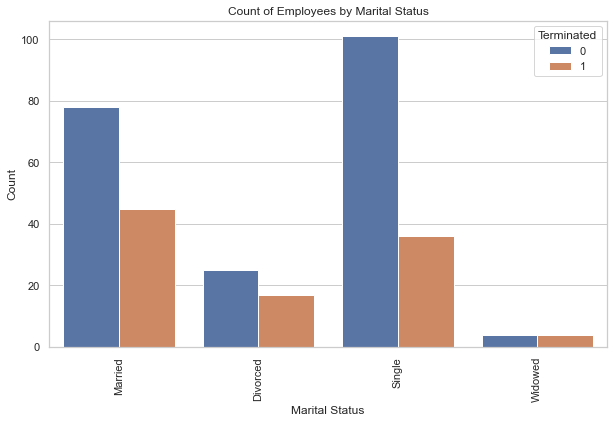

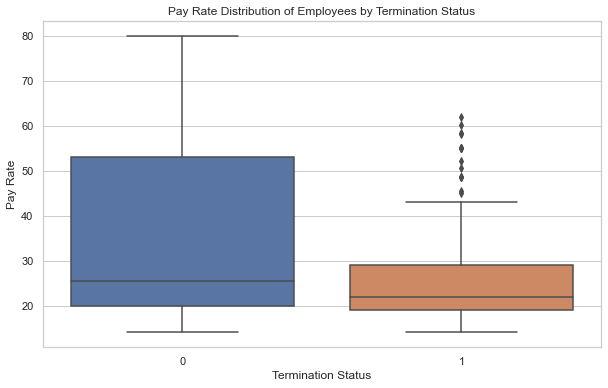

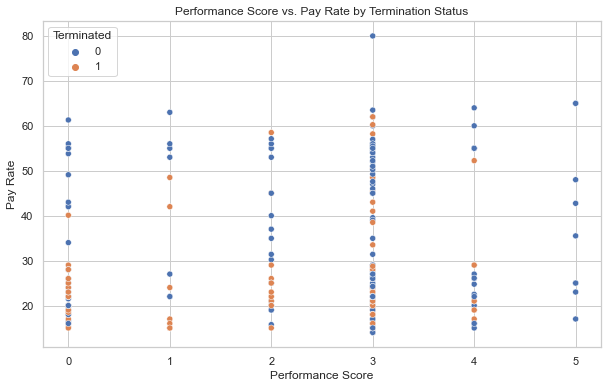

In [44]:
# Set style for seaborn plots
sns.set(style="whitegrid")

# Combine 'Divorced' and 'Separated' values into a single category
df['MaritalDesc'] = df['MaritalDesc'].replace({'Separated': 'Divorced'})

# Bar plot for MaritalDesc
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MaritalDesc', hue='Terminated')
plt.title('Count of Employees by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Terminated', loc='upper right')
plt.show()

# Box plot for Pay Rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Terminated', y='Pay Rate')
plt.title('Pay Rate Distribution of Employees by Termination Status')
plt.xlabel('Termination Status')
plt.ylabel('Pay Rate')
plt.show()

# Scatter plot for Performance Score vs. Pay Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Performance Score', y='Pay Rate', hue='Terminated')
plt.title('Performance Score vs. Pay Rate by Termination Status')
plt.xlabel('Performance Score')
plt.ylabel('Pay Rate')
plt.legend(title='Terminated', loc='upper left')
plt.show()

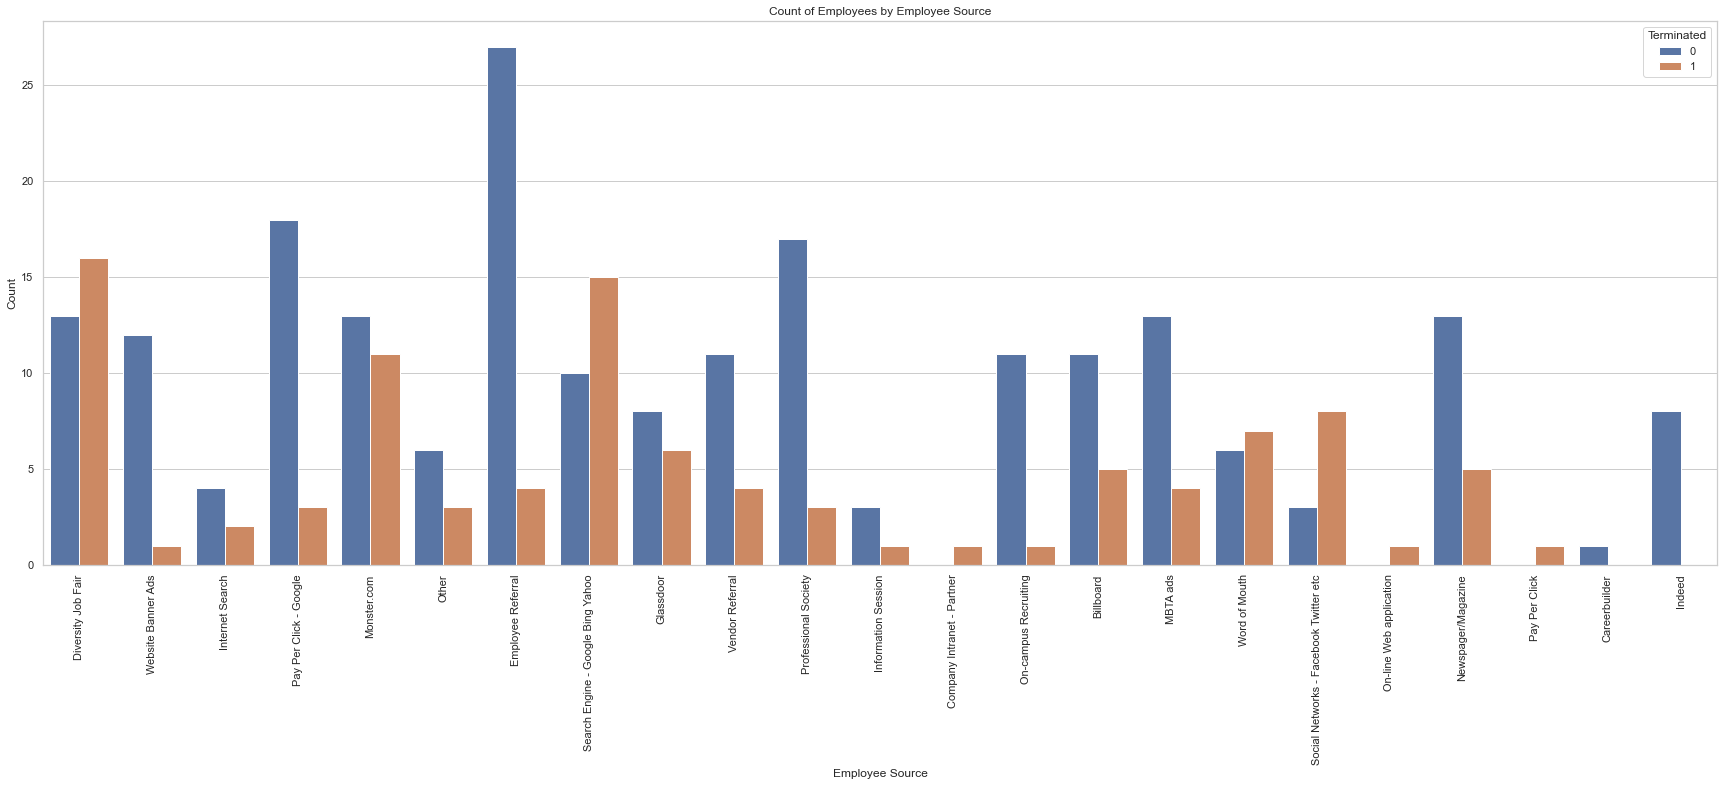

In [39]:
#Count of Employee by Employee Source
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='Employee Source', hue='Terminated')
plt.title('Count of Employees by Employee Source')
plt.xlabel('Employee Source')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Terminated', loc='upper right')
plt.show()

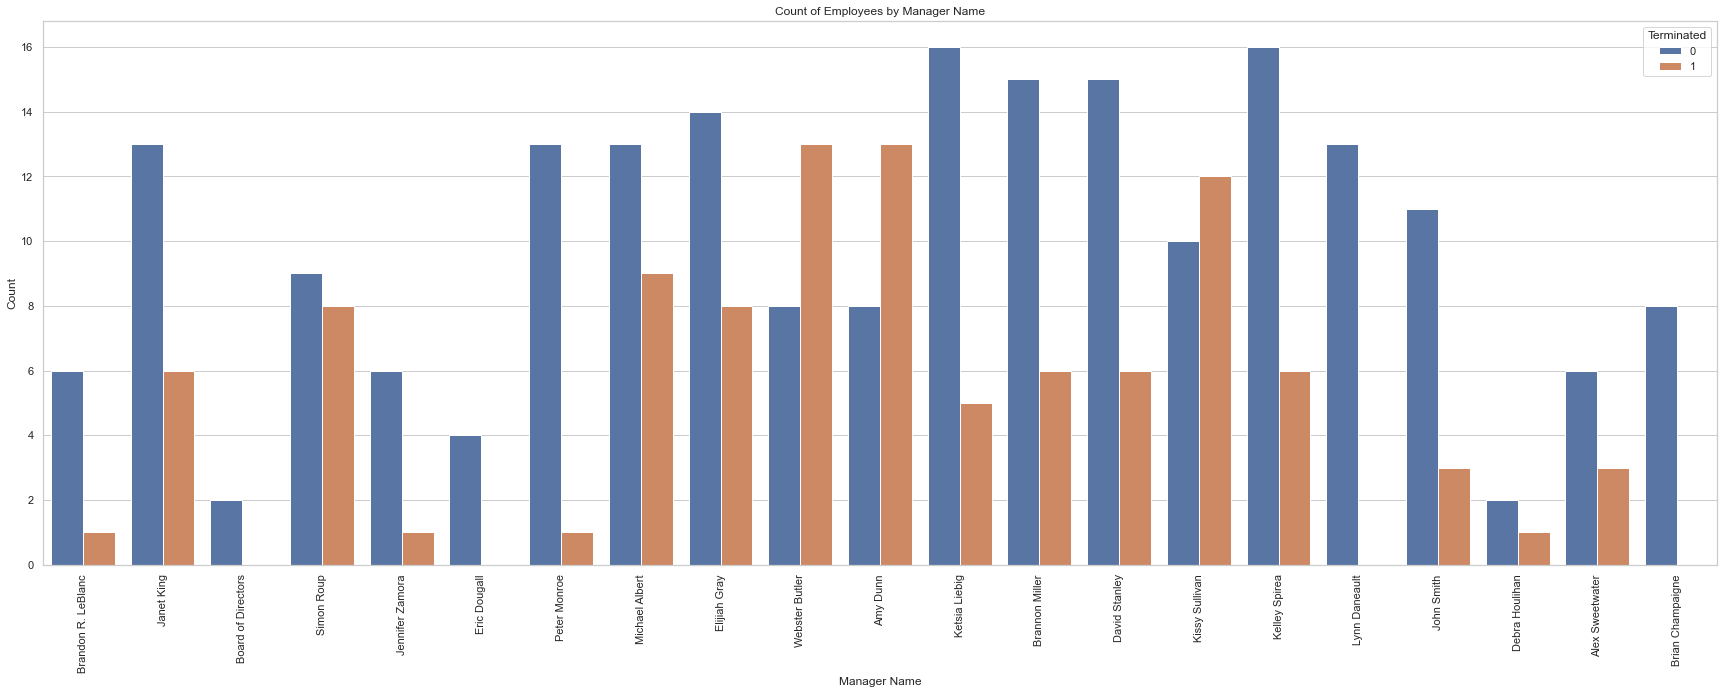

In [38]:
# Count of Employee by Manager Name
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='Manager Name', hue='Terminated')
plt.title('Count of Employees by Manager Name')
plt.xlabel('Manager Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Terminated', loc='upper right')
plt.show()

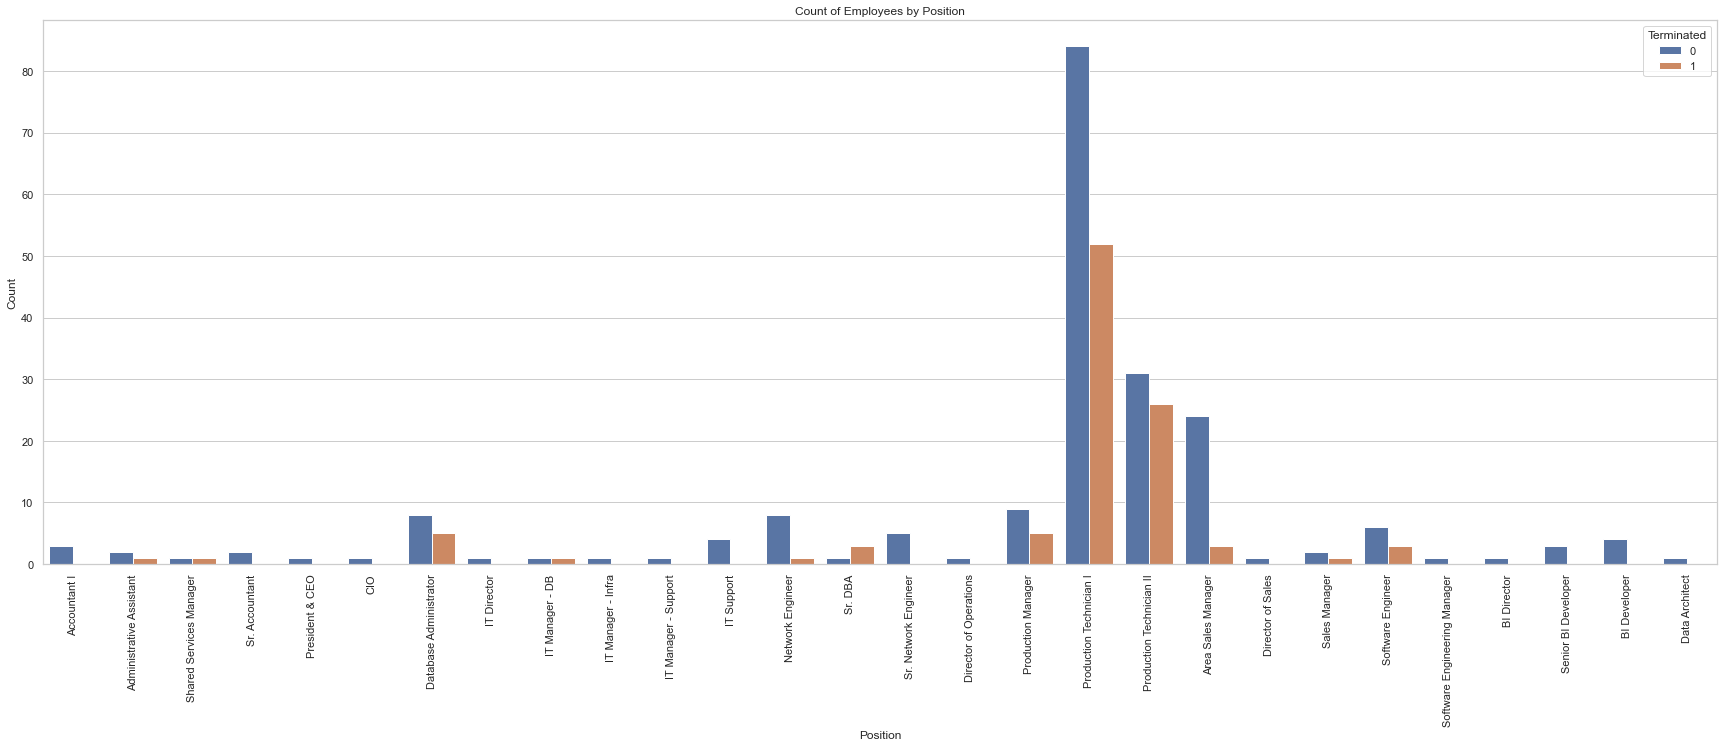

In [42]:
# Bar plot for Position
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='Position', hue='Terminated')
plt.title('Count of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Terminated', loc='upper right')
plt.show()



#### Graph 1: Count of Employees by Marital Status

##### Analysis
- **Married Employees**: The majority of married employees are not terminated, but there is a significant portion (around 40) who are terminated. This indicates that while married employees form a stable part of the workforce, they also have a considerable termination rate.
- **Divorced Employees**: There is an almost equal distribution between terminated and non-terminated employees, indicating potential instability or challenges faced by this group.
- **Single Employees**: Most single employees are not terminated (around 100), with a smaller but notable number terminated (around 40). Single employees seem to have a lower termination rate compared to their presence in the workforce.

##### Insights
- Single and married employees dominate the workforce, with single employees showing a lower termination rate relative to their numbers.


## Recommendation
- **Support Programs for Employees**: Implement support programs focusing on the well-being of all employees to reduce their termination rates. This can include counseling services or flexible work arrangements (specifically for the married employees as their terminaton rate is high)
- **Employee Engagement**: Strengthen engagement and retention strategies for married employees to reduce their termination rates. This can involve family-friendly policies and work-life balance initiatives. For example like work from home policy 


#### Graph 2: Pay Rate Distribution of Employees by Termination Status

##### Analysis
- **Non-Terminated Employees**: The median pay rate is around 30, with an interquartile range (IQR) from about 20 to 50, indicating a broad distribution of pay rates with no significant outliers.
- **Terminated Employees**: The median pay rate is lower, around 24, with an IQR from about 21 to 30. There are several outliers extending up to around 60, indicating that some terminated employees had relatively high pay rates.

##### Insights
- Non-terminated employees generally have higher median pay rates and more variability in their pay, suggesting a diverse compensation structure.
- Terminated employees tend to have lower pay rates with a narrower distribution, indicating that lower-paid employees are more likely to be terminated.
- The presence of high-pay outliers among terminated employees suggests that performance or other factors, not just pay, influence termination decisions.

##### Recommendations
- **Review Compensation Structure**: Regularly review and adjust the compensation structure to ensure it aligns with market standards and employee performance.
- **Performance-Based Pay Adjustments**: Implement performance-based pay adjustments to incentivize high performance and reduce the likelihood of termination among lower-paid employees.
- **Retention Strategies for High Performers**: Develop retention strategies for high-performing employees who are at risk of termination despite higher pay, focusing on career development and recognition programs.

#### Graph 3: Performance Score vs. Pay Rate by Termination Status

##### Analysis
- **Fully Meets**: There is a wide range of pay rates for both terminated and non-terminated employees, with non-terminated employees generally having higher pay.
- **N/A - Too Early to Review**: These employees have lower pay rates, with no clear distinction between terminated and non-terminated statuses.
- **90-day Meets**: Similar to "Fully Meets," but with lower overall pay rates.
- **Exceptional**: These employees have higher pay rates overall, with non-terminated employees having significantly higher pay.
- **Needs Improvement**: These employees have lower pay rates, with a significant portion being terminated.
- **Exceeds**: These employees have higher pay rates, mostly among non-terminated employees.
- **PIP**: These employees have lower pay rates, with more terminated employees.

##### Insights
- Higher performance scores (Exceptional, Exceeds) are associated with higher pay rates and lower termination rates.
- Lower performance scores (Needs Improvement, PIP) correlate with lower pay rates and higher termination rates.
- Employees with "Fully Meets" performance scores show a wide range of pay rates, indicating that pay variability exists regardless of termination status.

##### Recommendations
- **Performance-Based Pay Increases**: Implement regular performance-based pay increases to reward high performers and reduce the risk of termination among top talent.
- **Performance Improvement Programs**: Enhance performance improvement programs for employees with lower performance scores to help them improve and reduce their termination risk.
- **Career Development Plans**: Develop career development plans for employees with "Fully Meets" performance scores to provide growth opportunities and reduce turnover.

